In [1]:
import os, importlib, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import join, isfile
sys.path.append('../../code/src')

In [125]:
df_contribution = pd.read_csv('../../data/final/pmf_contribution_in_ppbv.csv')
df_contribution['Date'] = pd.to_datetime(df_contribution['Date'])

# set all negative value to zero
df_contribution_value = df_contribution.iloc[:, 1:]
df_contribution_value[df_contribution_value < 0] = 0
df_contribution_value[df_contribution_value > 200] = np.nan
df_contribution.iloc[:,1:] = df_contribution_value


In [126]:
# O3 data (MDA8 O3)
df_O3_MDA8 = pd.read_csv('../../data/final/MDA8_O3_redlands.csv')
df_O3_MDA8['Date'] = pd.to_datetime(df_O3_MDA8['Date'])

# O3 data (chamber O3)
df_O3_chamber = pd.read_csv('../../data/final/O3_sensitivity_redlands.csv')
df_O3_chamber['Date'] = pd.to_datetime(df_O3_chamber['Date'])

In [127]:
df_plot = df_contribution.merge(df_O3_MDA8[['Date','MDA8']], on='Date', how='left')
df_plot = df_plot.merge(df_O3_chamber[['Date','bag2_3hr','b1_b2_3hr']], on='Date', how='left')

df_plot = df_plot.sort_values(by='MDA8').reset_index(drop=True)

Text(0, 0.5, 'VOC (ppbv)')

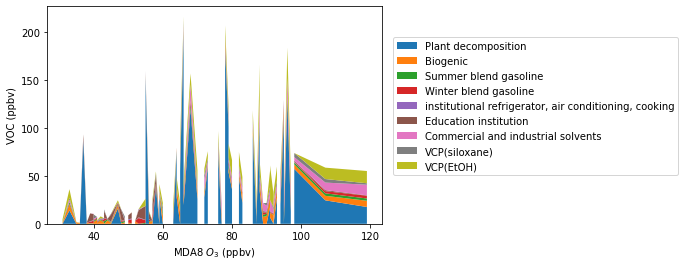

In [128]:
df_plot = df_contribution.merge(df_O3_MDA8[['Date','MDA8']], on='Date', how='left')
df_plot = df_plot.merge(df_O3_chamber[['Date','bag2_3hr','b1_b2_3hr']], on='Date', how='left')

df_plot = df_plot.sort_values(by='MDA8').reset_index(drop=True)
plt.stackplot(df_plot['MDA8'], df_plot.iloc[:,1], 
              df_plot.iloc[:,2],
              df_plot.iloc[:,3],df_plot.iloc[:,4],df_plot.iloc[:,5],df_plot.iloc[:,6],
              df_plot.iloc[:,7], df_plot.iloc[:,8],df_plot.iloc[:,9], 
              labels=df_plot.columns[1:10])
plt.legend(bbox_to_anchor=(1.9, 0.88))
plt.xlabel('MDA8 $O_3$ (ppbv)')
plt.ylabel('VOC (ppbv)')

Text(0, 0.5, 'VOC from each source (ppbv)')

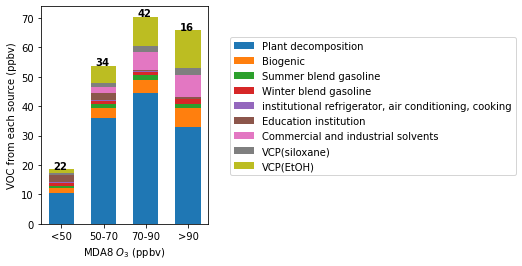

In [129]:
# bin by MDA8 O3 50,70,90
df_plot['MDA8_bin'] = pd.cut(df_plot['MDA8'], bins=[0,50,70,90,120], 
                             labels=['<50','50-70','70-90','>90'])
df_plot_bin = df_plot.groupby('MDA8_bin').mean()

fig, ax=plt.subplots(1, figsize=(3, 4))

x = df_plot_bin.index
bottom = np.zeros(len(x))

for i in np.arange(0,9,1):
    ax.bar(x, df_plot_bin.iloc[:,i], width=0.6,
           bottom=bottom, label=df_plot_bin.columns[i])
    bottom = bottom + df_plot_bin.iloc[:,i]

sample_size = df_plot.groupby('MDA8_bin').count().iloc[:,0]
for j in range(4):
    ax.text(j-0.2, bottom[j]+0.2, str(sample_size[j]), fontsize=10, fontweight='bold')

ax.legend(bbox_to_anchor=(1.1, 0.88))
ax.set_xlabel('MDA8 $O_3$ (ppbv)')
ax.set_ylabel('VOC from each source (ppbv)')

Text(0, 0.5, 'VOC from each source (%)')

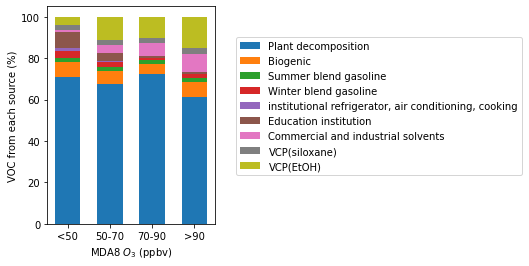

In [100]:
# calculate percentage
df_plot_bin['tot'] = df_plot_bin.iloc[:,0:9].sum(axis=1)
for i in np.arange(0,9,1):
    df_plot_bin.iloc[:,i] = df_plot_bin.iloc[:,i]/df_plot_bin['tot']*100

# plot
fig, ax=plt.subplots(1, figsize=(3, 4))
x = df_plot_bin.index
bottom = np.zeros(len(x))

for i in np.arange(0,9,1):
    ax.bar(x, df_plot_bin.iloc[:,i], width=0.6,
           bottom=bottom, label=df_plot_bin.columns[i])
    bottom = bottom + df_plot_bin.iloc[:,i]
ax.legend(bbox_to_anchor=(1.1, 0.88))
ax.set_xlabel('MDA8 $O_3$ (ppbv)')
ax.set_ylabel('VOC from each source (%)')

Text(0, 0.5, 'VOC from each source (ppbv)')

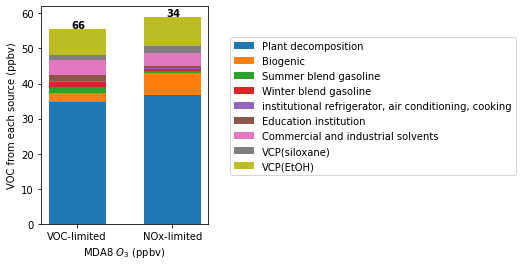

In [137]:
df_plot = df_contribution.merge(df_O3_MDA8[['Date','MDA8']], on='Date', how='left')
df_plot = df_plot.merge(df_O3_chamber[['Date','bag2_3hr','b1_b2_3hr']], on='Date', how='left')

df_plot = df_plot[(df_plot['b1_b2_3hr'].notna())&(df_plot['MDA8']>00)&(df_plot['MDA8']<120)]
df_plot['O3_sensitivity_bin'] = pd.cut(df_plot['b1_b2_3hr'], bins=[-20,0,20], 
                             labels=['VOC-limited','NOx-limited'])
df_plot_bin = df_plot.groupby('O3_sensitivity_bin').mean()

fig, ax=plt.subplots(1, figsize=(3, 4))

x = df_plot_bin.index
bottom = np.zeros(len(x))

for i in np.arange(0,9,1):
    ax.bar(x, df_plot_bin.iloc[:,i], width=0.6,
           bottom=bottom, label=df_plot_bin.columns[i])
    bottom = bottom + df_plot_bin.iloc[:,i]

sample_size = df_plot.groupby('O3_sensitivity_bin').count().iloc[:,0]
for j in range(2):
    ax.text(j-0.06, bottom[j]+0.2, str(sample_size[j]), fontsize=10, fontweight='bold')

ax.legend(bbox_to_anchor=(1.1, 0.88))
ax.set_xlabel('MDA8 $O_3$ (ppbv)')
ax.set_ylabel('VOC from each source (ppbv)')

Text(0, 0.5, 'VOC from each source (%)')

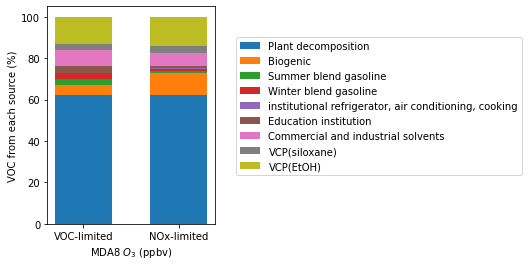

In [138]:
# calculate percentage
df_plot_bin['tot'] = df_plot_bin.iloc[:,0:9].sum(axis=1)
for i in np.arange(0,9,1):
    df_plot_bin.iloc[:,i] = df_plot_bin.iloc[:,i]/df_plot_bin['tot']*100

# plot
fig, ax=plt.subplots(1, figsize=(3, 4))
x = df_plot_bin.index
bottom = np.zeros(len(x))

for i in np.arange(0,9,1):
    ax.bar(x, df_plot_bin.iloc[:,i], width=0.6,
           bottom=bottom, label=df_plot_bin.columns[i])
    bottom = bottom + df_plot_bin.iloc[:,i]
ax.legend(bbox_to_anchor=(1.1, 0.88))
ax.set_xlabel('MDA8 $O_3$ (ppbv)')
ax.set_ylabel('VOC from each source (%)')

Text(0, 0.5, 'NOx (ppbv)')

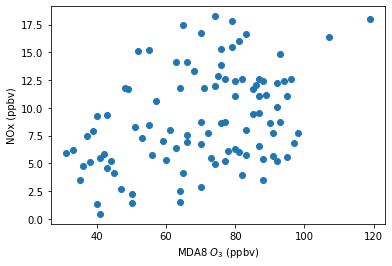

In [139]:
df_NOx = pd.read_csv('../../data/final/daily_avg_initial_NOx_conc_redlands.csv')
df_NOx['Date'] = pd.to_datetime(df_NOx['Date'])

df_plot = df_NOx.merge(df_O3_MDA8[['Date','MDA8']], on='Date', how='left')
df_plot = df_plot.merge(df_O3_chamber[['Date','bag2_3hr','b1_b2_3hr']], on='Date', how='left')

df_plot['MDA8_bin'] = pd.cut(df_plot['MDA8'], bins=[0,50,70,90,120], 
                             labels=['<50','50-70','70-90','>90'])

plt.scatter(df_plot['MDA8'], df_plot['NOx'])
plt.xlabel('MDA8 $O_3$ (ppbv)')
plt.ylabel('NOx (ppbv)')


<AxesSubplot:xlabel='MDA8_bin', ylabel='NOx'>

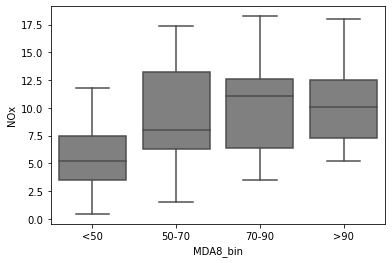

In [143]:
import seaborn as sns
sns.boxplot(x='MDA8_bin', y='NOx', data=df_plot, color='grey')

Text(0, 0.5, 'NOx (ppbv)')

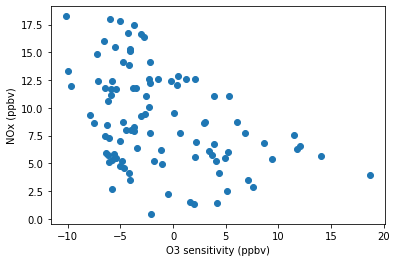

In [140]:
plt.scatter(df_plot['b1_b2_3hr'], df_plot['NOx'])
plt.xlabel('O3 sensitivity (ppbv)')
plt.ylabel('NOx (ppbv)')


In [145]:
df_plot.loc[df_plot['b1_b2_3hr']<0,'O3_sensitivity'] = 'VOC-limited'
df_plot.loc[df_plot['b1_b2_3hr']>0,'O3_sensitivity'] = 'NOx-limited'

<AxesSubplot:xlabel='O3_sensitivity', ylabel='NOx'>

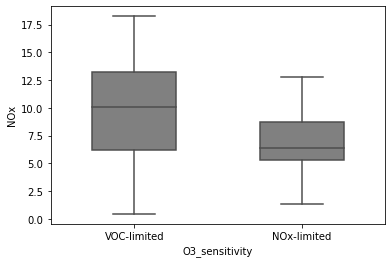

In [147]:
sns.boxplot(x='O3_sensitivity', y='NOx', data=df_plot, color='grey', width=0.5)